![Title](cisco.png)

# Lab - Internet Speed Compliance 


### Objectives
<p>
<li>**Parte 1: Determinar si la velocidad de Internet proporcionada cumple con la establecida en el contrato
del proveedor**
<li>**Parte 2: Redactar un informe para el proveedor de Internet (opcional)**

## Part 1: Determine si la velocidad de Internet proporcionada cumple con la establecida en el contrato del proveedor.

In [94]:
# importamos las bibliotecas relevantes
import numpy as np
import pandas as pd
import datetime
import sklearn
import matplotlib.pyplot as plt
import seaborn

%matplotlib inline

##### Step 1: Importing and cleaning data

The file `rpi_data_compact.csv` contains the Internet speed data you need. You must clean the Internet speed data and save the result in a new file called `rpi_data_processed.csv`.
 

In [95]:
# Import data from csv file into a dataframe and display the first few rows
df_compact = pd.read_csv ('rpi_data_compact.csv')
df_compact.head()

,Unnamed: 0,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time
0,0,26.992,91.80,14.31,2016-11-24,13:36:25
1,1,24.532,88.19,14.12,2016-11-24,13:36:55
2,2,20.225,59.86,14.11,2016-11-24,13:37:25
3,3,19.332,91.81,14.22,2016-11-24,13:37:57
4,4,22.494,92.05,14.08,2016-11-24,13:38:27


In [96]:
# Eliminamos la columna adicional 'Unnamed'
df_compact.drop(['Unnamed: 0'], axis=1, inplace = True)
df_compact.head()

,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time
0,26.992,91.80,14.31,2016-11-24,13:36:25
1,24.532,88.19,14.12,2016-11-24,13:36:55
2,20.225,59.86,14.11,2016-11-24,13:37:25
3,19.332,91.81,14.22,2016-11-24,13:37:57
4,22.494,92.05,14.08,2016-11-24,13:38:27


Find and remove any null values

In [97]:
# How many values in dataframe are NaN?
NaNs_in_df = df_compact.isnull()
print(type(NaNs_in_df))
NaNs_in_df.head()

<class 'pandas.core.frame.DataFrame'>


,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False


In [98]:
#Con la función sum() podemos convertir los valores True en 1 y los False en 0
NaNs_per_column = NaNs_in_df.sum()
print(type(NaNs_per_column))
NaNs_per_column.head()

<class 'pandas.core.series.Series'>


Ping (ms)            1
Download (Mbit/s)    1
Upload (Mbit/s)      7
Date                 7
Time                 7
dtype: int64

In [99]:
#El archivo tiene 23 valores nulos
NaN_total = df_compact.isnull().sum().sum()
print(NaN_total)

23


In [100]:
# Remove NaN values
df_compact_clean = df_compact.dropna()
#Comprobamos que se han eliminado
NaNs_total2 = np.round(df_compact_clean.isnull().sum().sum())
print('The DataFrame contains : {} NaNs'.format(NaNs_total2)) 

The DataFrame contains : 0 NaNs


In [101]:
#Convertir el valor de ping y de descarga en flotantes
df_compact_clean.dtypes

Ping (ms)             object
Download (Mbit/s)     object
Upload (Mbit/s)      float64
Date                  object
Time                  object
dtype: object

In [102]:
# Convert Ping and Download to float
df_compact_clean['Ping (ms)'] = df_compact_clean['Ping (ms)'].astype('float64')
df_compact_clean['Download (Mbit/s)'] = df_compact_clean['Download (Mbit/s)'].astype('float64')

#Check that the types have been successfully converted
df_compact_clean.dtypes

/Users/vicmonmena/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/vicmonmena/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Ping (ms)            float64
Download (Mbit/s)    float64
Upload (Mbit/s)      float64
Date                  object
Time                  object
dtype: object

In [103]:
# Save the new cleaned dataframe to a csv called rpi_data_processed.csv
# Make sure to use 'index=False' so that you do not introduce an additional column
# Guardar el archivo en un csv
df_compact_clean.to_csv('./rpi_data_processed.csv', index=False)

df_clean = df_compact_clean

##### Step 2: Comprensión de la promesa

Las siguientes tareas le permitirán elegir una **velocidad de Internet aceptable**. Este valor se utilizará
entonces para evaluar si su proveedor ofrece un servicio de calidad satisfactoria.

* Haga una investigación en línea para probar y descubrir qué velocidad de descarga es razonable esperar en su área. Es probable que también desee una velocidad de Internet necesaria para una tarea dada. 

* Grafique sus datos y decida un valor para la **velocidad de descarga**, la **velocidad de carga** y el **tiempo de ping** mínimos aceptables. La expectativa mínima que desea también se debe tener en cuenta.

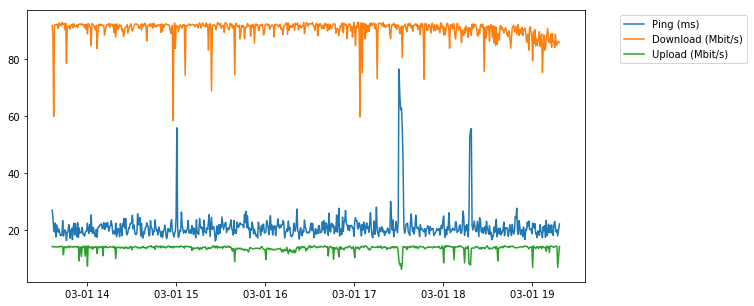

In [104]:
# Initialise figure
fig, ax = plt.subplots(figsize=(10, 5))

# Create x-axis
t = pd.to_datetime(df_clean['Time'])

# Plot three curves of different colors
ax.plot(t, df_clean['Ping (ms)'], label='Ping (ms)')
ax.plot(t, df_clean['Download (Mbit/s)'], label='Download (Mbit/s)')
ax.plot(t, df_clean['Upload (Mbit/s)'], label='Upload (Mbit/s)')

# Insert legend
ax.legend(bbox_to_anchor=(1.3, 1.))
plt.show()

In [105]:
# Record the values you consider acceptable in these variables
acceptable_upload = 13 #Mbit/s
acceptable_download = 88 #Mbit/s
acceptable_ping = 20 #ms

##### Step 3: Comparing with expectations

Tenemos un conjunto de datos limpio y hemos especificado los valores aceptables. Podemos comenzar con tareas sencillas y avanzar gradualmente a métodos más avanzados.

a) Trazamos histogramas por velocidad de descarga, velocidad de carga y tiempo de ping. Utilizaremos una línea vertical para indicar el valor que considera aceptable para cada medición.

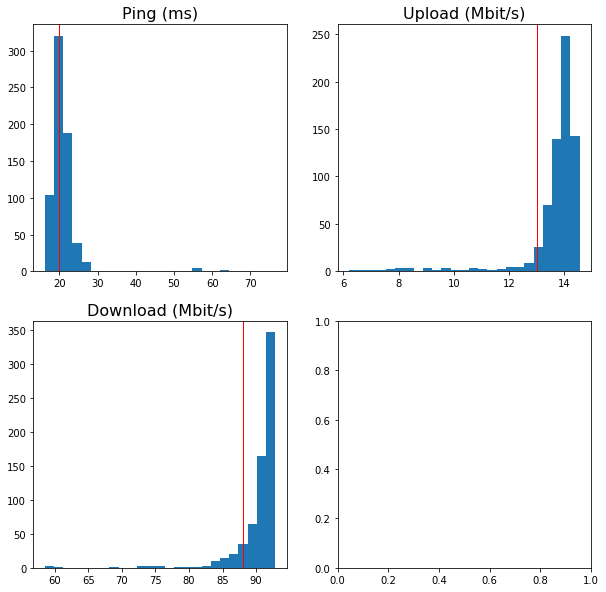

In [112]:
# Initialize figure
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
# Create x-axis
t = pd.to_datetime(df_clean['Time'])

# plot ping speed
ax[0][0].hist(df_clean['Ping (ms)'], 25)
# plot acceptable ping 
ax[0][0].axvline(acceptable_ping, color='red', linewidth=1)
ax[0][0].set_title('Ping (ms)', fontsize=16)

# plot upload speed
ax[0][1].hist(df_clean['Upload (Mbit/s)'], 25)
# plot acceptable_upload 
ax[0][1].axvline(acceptable_upload, color='red', linewidth=1)
ax[0][1].set_title('Upload (Mbit/s)', fontsize=16)

# plot download speed
ax[1][0].hist(df_clean['Download (Mbit/s)'], 25)
# plot acceptable download 
ax[1][0].axvline(acceptable_download, color='red', linewidth=1)
ax[1][0].set_title('Download (Mbit/s)', fontsize=16)


# Mostramos los histogramas
plt.show()

b) Compute the mean and standard deviation of download rate, upload rate, and ping time and calculate how many standard deviations separate the acceptable values from the average ones. 

In [125]:
# Calcul el promedio y la desviación esta´ndar, y cuántas desviaciones estándar separan a los valores aceptables
# de los valores promedios.
means = df_clean.mean()
stands = df_clean.std()

# this makes the results look better with labels
quote_ping = (means['Ping (ms)'], stands['Ping (ms)'])
quote_download = (means['Download (Mbit/s)'], stands['Download (Mbit/s)'])
quote_upload = (means['Upload (Mbit/s)'], stands['Upload (Mbit/s)'])

# print the results
print('Average ping time: {} ± {} ms'.format(*quote_ping))
print ('Average download speed: {} ± {} ms'.format(*quote_download))
print('Average upload speed: {} ± {} Mbit/s'.format(*quote_upload))

print(' ') # blank line
print('Distance of acceptable Ping speed from average: {:.2f} standard deviations'.format((quote_ping[0]-acceptable_ping)/quote_ping[1]))
print('Distance of acceptable Download speed from average: {:.2f} standard deviations'.format((quote_download[0]-acceptable_download)/quote_download[1]))
print('Distance of acceptable Upload speed from average: {:.2f} standard deviations'.format((quote_upload[0]-acceptable_upload)/quote_upload[1]))


Average ping time: 21.115451708766724 ± 5.161225495663228 ms
Average download speed: 90.44921248142644 ± 3.4656470318152284 ms
Average upload speed: 13.697607726597328 ± 1.0804708853031768 Mbit/s
 
Distance of acceptable Ping speed from average: 0.22 standard deviations
Distance of acceptable Download speed from average: 0.71 standard deviations
Distance of acceptable Upload speed from average: 0.65 standard deviations


In [126]:
#Calculamos el porcentaje de mediciones de velocidad de decarga, velocidad de carga y ping que no son aceptables.
print('{:.2f}% of measurements are lower than the acceptable ping speed.'.format(np.sum(df_clean['Ping (ms)']<acceptable_ping)/float(len(df_clean))*100))
print('{:.2f}% of measurements are lower than the acceptable download speed.'.format(np.sum(df_clean['Download (Mbit/s)']<acceptable_download)/float(len(df_clean))*100))
print('{:.2f}% of measurements are lower than the acceptable upload speed.'.format(np.sum(df_clean['Upload (Mbit/s)']<acceptable_upload)/float(len(df_clean))*100))

42.79% of measurements are lower than the acceptable ping speed.
11.00% of measurements are lower than the acceptable download speed.
7.88% of measurements are lower than the acceptable upload speed.


In [127]:
# Porcentaje de mediciones que no satisface sus criterios de servicio en las 3 cantidades.
all_three = np.sum((df_clean['Ping (ms)']>acceptable_ping) & (df_clean['Download (Mbit/s)']<acceptable_download) & (df_clean['Upload (Mbit/s)']<acceptable_upload))
print('{:.2f}% of measurements are not acceptable in three cases.'.format(all_three/float(len(df_clean))*100))

0.74% of measurements are not acceptable in three cases.


In [128]:
# Porcentaje de mediciones que no satisface sus criterios de servicio aceptable en 2 de las 3 cantidades.
ping_upload = np.sum((df_clean['Ping (ms)']>acceptable_ping) & (df_clean['Upload (Mbit/s)']<acceptable_upload))
print('{:.2f}% of measurements are not acceptable for ping and upload.'.format(ping_upload/float(len(df_clean))*100))

ping_download = np.sum((df_clean['Ping (ms)']>acceptable_ping) & (df_clean['Download (Mbit/s)']<acceptable_download))
print('{:.2f}% of measurements are not acceptable for ping and download.'.format(ping_download/float(len(df_clean))*100))

upload_download = np.sum((df_clean['Upload (Mbit/s)']>acceptable_upload) & (df_clean['Download (Mbit/s)']<acceptable_download))
print('{:.2f}% of measurements are not acceptable for upload and download.'.format(upload_download/float(len(df_clean))*100))



4.90% of measurements are not acceptable for ping and upload.
6.39% of measurements are not acceptable for ping and download.
9.66% of measurements are not acceptable for upload and download.


Ahora tiene una buena idea de qué esperar de la conexión de Internet y conocen qué es aceptable y qué no
lo es.

<font size='0.5'>&copy; 2017 Cisco and/or its affiliates. All rights reserved. This document is Cisco Public.<font>